In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# XRD Data

In [12]:
xrd_data = pd.read_excel("/content/XRD.xlsx")
xrd_data.head()

,Angle,K10-I,PANI-I,PANI-C-I,PANI-EC-I
0,5.0125,57,36,48,31
1,5.0375,51,37,46,43
2,5.0625,42,41,40,33
3,5.0875,39,35,40,45
4,5.1125,48,40,52,41


In [13]:
#Cleaning
xrd_data.dropna(inplace=True)

#Smoothing
#1. Moving Average:

#window_size = 15
#xrd_data['S_K10'] = xrd_data['K10-I'].rolling(window=window_size).mean()

#2. Savitzky-Golay Filter:

window_size =49  # Adjust the window size as needed
order = 3  # Adjust the polynomial order as needed
xrd_data['Smoothed_K10'] = savgol_filter(xrd_data['K10-I'], window_size, order)
xrd_data['Smoothed_PANI'] = savgol_filter(xrd_data['PANI-I'], window_size, order)
xrd_data['Smoothed_PANI-C'] = savgol_filter(xrd_data['PANI-C-I'], window_size, order)
xrd_data['Smoothed_PANI-EC'] = savgol_filter(xrd_data['PANI-EC-I'], window_size, order)

xrd_data.head()

,Angle,K10-I,PANI-I,PANI-C-I,PANI-EC-I,Smoothed_K10,Smoothed_PANI,Smoothed_PANI-C,Smoothed_PANI-EC
0,5.0125,57,36,48,31,47.720657,34.819485,48.053652,38.233447
1,5.0375,51,37,46,43,47.251538,35.493245,47.285017,38.246394
2,5.0625,42,41,40,33,46.818918,36.085815,46.565962,38.224775
3,5.0875,39,35,40,45,46.420750,36.600610,45.894556,38.170437
4,5.1125,48,40,52,41,46.054986,37.041043,45.268868,38.085226


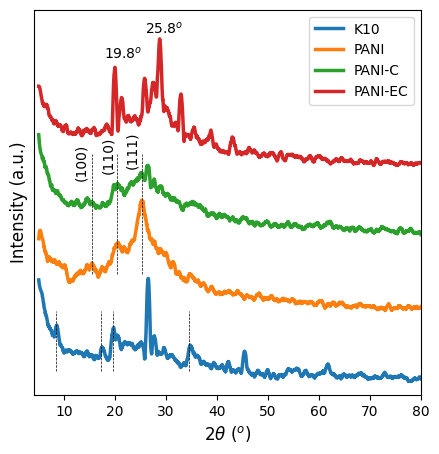

In [64]:
#Plotting and Saving figures
#Plotting the data
fig = plt.figure(1,figsize=(5,5))
plt.plot(xrd_data["Angle"],xrd_data["Smoothed_K10"],label="K10",ls="-",lw=2.5)
plt.plot(xrd_data["Angle"],xrd_data["Smoothed_PANI"]+30,label="PANI",ls="-",lw=2.5)
plt.plot(xrd_data["Angle"],xrd_data["Smoothed_PANI-C"]+60,label="PANI-C",ls="-",lw=2.5)
plt.plot(xrd_data["Angle"],xrd_data["Smoothed_PANI-EC"]+90,label="PANI-EC",ls="-",lw=2.5)

#Extra Lines for clarification
plt.plot([15.4,15.4],[50,100],color='black',linestyle='--',lw=0.5)
plt.plot([20.3,20.3],[50,100],color='black',linestyle='--',lw=0.5)
plt.plot([25.2,25.2],[50,100],color='black',linestyle='--',lw=0.5)
plt.plot([8.5,8.5],[10,35],color='black',linestyle='--',lw=0.5)
plt.plot([17.2,17.2],[10,35],color='black',linestyle='--',lw=0.5)
plt.plot([19.6,19.6],[10,35],color='black',linestyle='--',lw=0.5)
plt.plot([34.5,34.5],[10,35],color='black',linestyle='--',lw=0.5)


plt.xlim(4,80)
plt.ylim(0,160)
plt.yticks([])
plt.legend()
plt.xlabel("2$θ$ $(^o)$",fontsize=12)
plt.ylabel("Intensity (a.u.)",fontsize=12)

#Annotations
#plt.text(8.9,32,"8.5$^o$",fontsize=10)
#plt.text(13,40,"17.2$^o$",fontsize=10)
#plt.text(18,35,"19.6$^o$",fontsize=10)
#plt.text(24,100,"25.2$ ^o$",fontsize=10)
plt.text(25.8,150,"25.8$ ^o$",fontsize=10)
plt.text(17.8,140,"19.8$ ^o$",fontsize=10)
plt.text(12,90,"(100)",rotation=90,fontsize=10)
plt.text(17.2,93,"(110)",rotation=90,fontsize=10)
plt.text(22,95,"(111)",rotation=90,fontsize=10)

#for saving figure in high quality
#plt.savefig('XRD080224.png', format='png', dpi=1200,bbox_inches='tight')

# FTIR Data

In [65]:
# Data Loading
ftir_data=pd.read_excel("/content/FTIR.xlsx")
ftir_data.dropna(inplace=True)
ftir_data.head()

,Wave number,PANI-Abs,PANI-C-Abs,PANI-EC-Abs
0,399.26491,67.27926,55.62934,60.75981
1,401.19373,67.51122,62.77406,67.38456
2,403.12254,72.07686,69.62285,70.70235
3,405.05136,63.26871,70.72061,64.78736
4,406.98018,59.08759,72.18150,56.74392


In [ ]:
# Load data from the text file
data = np.loadtxt('/content/KIO.txt')
K10_wavenumber= data[:,0]
K10 = data[:, 1]

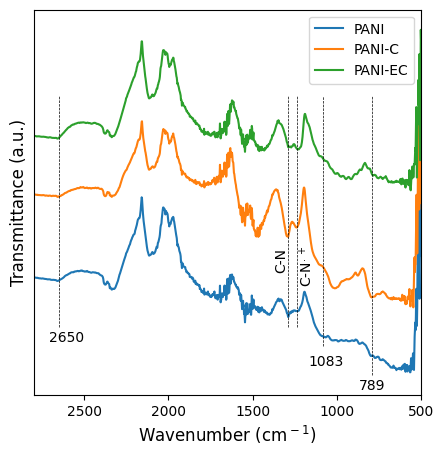

In [168]:
#Smoothing data

#Savitzky-Golay Filter:
#window_size =7  # Adjust the window size as needed
#order = 3  # Adjust the polynomial order as needed
#ftir_data['Smoothed_PANI'] = savgol_filter(ftir_data['PANI-Abs'], window_size, order)
#ftir_data['Smoothed_PANI-C'] = savgol_filter(ftir_data['PANI-C-Abs'], window_size, order)
#ftir_data['Smoothed_PANI-EC'] = savgol_filter(ftir_data['PANI-EC-Abs'], window_size, order)

#Plotting the data
fig = plt.figure(2,figsize=(5,5))
#plt.plot(K10_wavenumber,K10,label="K10",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data["PANI-Abs"]-10,label="PANI",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data['PANI-C-Abs']-7,label="PANI-C",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data['PANI-EC-Abs']+5,label="PANI-EC",ls="-",lw=1.5)

#Extra Lines for clarification
plt.plot([1287,1287],[42,66],color='black',linestyle='--',lw=0.5)
plt.plot([1239,1239],[42,66],color='black',linestyle='--',lw=0.5)
plt.plot([2650,2650],[42,66],color='black',linestyle='--',lw=0.5)
plt.plot([1083,1083],[40,66],color='black',linestyle='--',lw=0.5)
plt.plot([789,789],[37,66],color='black',linestyle='--',lw=0.5)

#limits, ticks and label on the axes. If we pass empty list to ticks then it will hide values and ticks
plt.xlim(2800,500)
plt.ylim(35,75)
plt.yticks([])
plt.legend()
plt.xlabel("Wavenumber (cm$^-$$^1$)",fontsize=12)
plt.ylabel("Transmittance (a.u.)",fontsize=12)
plt.text(1370,48,"C-N",rotation=90,fontsize=10)
plt.text(1230,46.5,"C-N$^{.+}$",rotation=90,fontsize=10)
plt.text(2710,40.5,"2650",fontsize=10)
plt.text(1170,38,"1083",fontsize=10)
plt.text(870,35.5,"789",fontsize=10)
#for saving figure in high quality
#plt.savefig('FTIR_main.png', format='png', dpi=1200,bbox_inches='tight')

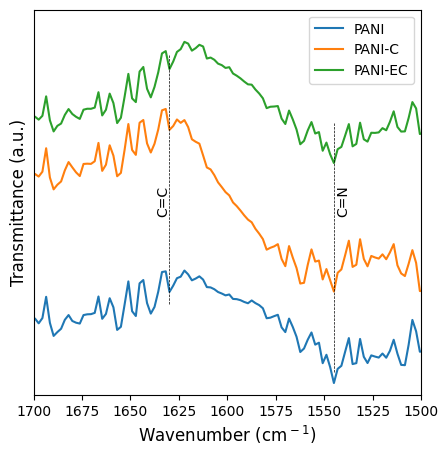

In [169]:
#Plotting the data
fig = plt.figure(3,figsize=(5,5))
#plt.plot(K10_wavenumber,K10,label="K10",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data["PANI-Abs"]-12,label="PANI",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data['PANI-C-Abs']-15,label="PANI-C",ls="-",lw=1.5)
plt.plot(ftir_data["Wave number"],ftir_data['PANI-EC-Abs']-5,label="PANI-EC",ls="-",lw=1.5)

#Extra Lines for clarification
plt.plot([1545,1545],[41,52],color='black',linestyle='--',lw=0.5)
plt.plot([1630,1630],[44,55],color='black',linestyle='--',lw=0.5)

#limits, ticks and label on the axes. If we pass empty list to ticks then it will hide values and ticks
plt.xlim(1700,1500)
plt.ylim(40,57)
plt.yticks([])
plt.legend()
plt.xlabel("Wavenumber (cm$^-$$^1$)",fontsize=12)
plt.ylabel("Transmittance (a.u.)",fontsize=12)
plt.text(1636.6,48,"C=C",rotation=90,fontsize=10)
plt.text(1543.6,48,"C=N",rotation=90,fontsize=10)
#plt.savefig('FTIR_inset.png', format='png', dpi=1200,bbox_inches='tight')

# UV-Visible

In [ ]:
# Data Loading
uv_data=pd.read_excel("/content/UV-Visible.xlsx")
uv_data.dropna(inplace=True)
uv_data.head()

,Wavelength,PANI-Abs,PANI-C-Abs,PANI-EC-Abs
0,800,0.02864,0.05751,0.01396
1,799,0.02635,0.05424,0.01090
2,798,0.02666,0.05550,0.01185
3,797,0.02666,0.05266,0.01024
4,796,0.02714,0.05453,0.01233


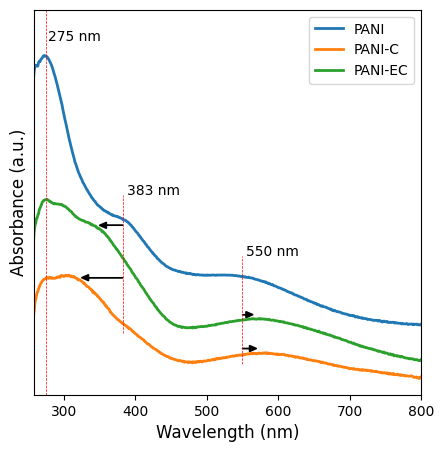

In [ ]:
#Plotting and Saving figures
#Plotting the data
fig = plt.figure(3,figsize=(5,5))
plt.plot(uv_data["Wavelength"],uv_data["PANI-Abs"]+0.2,label="PANI",ls="-",lw=2)
plt.plot(uv_data["Wavelength"],uv_data["PANI-C-Abs"],label="PANI-C",ls="-",lw=2)
plt.plot(uv_data["Wavelength"],uv_data["PANI-EC-Abs"]+0.1,label="PANI-EC",ls="-",lw=2)

#Extra Lines for clarification
plt.plot([275,275],[0,1.3],color='r',linestyle='--',lw=0.5)
plt.plot([383,383],[0.2,0.65],color='r',linestyle='--',lw=0.5)
plt.plot([550,550],[0.1,0.45],color='r',linestyle='--',lw=0.5)

# Add an arrow
arrow_start = (383, 0.55)
arrow_end = (350, 0.55)
plt.arrow(*arrow_start, arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
          color='black', head_width=0.02, head_length=10, length_includes_head=True,width=0.00001)
arrow_start = (383, 0.38)
arrow_end = (325, 0.38)
plt.arrow(*arrow_start, arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
          color='black', head_width=0.02, head_length=10, length_includes_head=True,width=0.00001)
arrow_start = (550, 0.26)
arrow_end = (565, 0.26)
plt.arrow(*arrow_start, arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
          color='black', head_width=0.02, head_length=10, length_includes_head=True,width=0.00001)
arrow_start = (550, 0.15)
arrow_end = (570, 0.15)
plt.arrow(*arrow_start, arrow_end[0] - arrow_start[0], arrow_end[1] - arrow_start[1],
          color='black', head_width=0.02, head_length=10, length_includes_head=True,width=0.00001)


#limits, ticks and label on the axes. If we pass empty list to ticks then it will hide values and ticks

plt.xlim(258,800)
plt.ylim(0,1.25)
plt.yticks([])
plt.legend()
plt.xlabel("Wavelength (nm)",fontsize=12)
plt.ylabel("Absorbance (a.u.)",fontsize=12)
plt.text(278,1.15,"275 nm",fontsize=10)
plt.text(389,0.65,"383 nm",fontsize=10)
plt.text(555,0.45,"550 nm",fontsize=10)

#for saving figure in high quality
#plt.savefig('UV_Visible_090124.png', format='png', dpi=1200,bbox_inches='tight')

# TAUC

In [ ]:
# Data Loading
tauc=pd.read_excel("/content/TAUC -Direct bandgap.xlsx")
tauc.dropna(inplace=True)
tauc.head()

,hv,PANI,PANI-C,PANI-EC
0,1.55000,0.01045,0.04215,0.00248
1,1.55194,0.00887,0.03758,0.00152
2,1.55388,0.00910,0.03945,0.00180
3,1.55583,0.00912,0.03560,0.00135
4,1.55779,0.00948,0.03827,0.00196


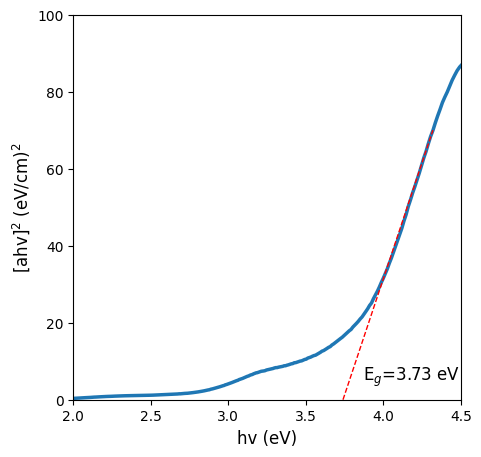

In [ ]:
#PANI Direct Bandgap
fig = plt.figure(4,figsize=(5,5))
plt.plot(tauc["hv"], tauc["PANI"],lw=2.5)
plt.plot([3.74,4.32],[0,70],ls="--", color='r',lw=1)
plt.xlim(2,4.5)
plt.ylim(0,100)
plt.xlabel("hv (eV)",fontsize=12)
plt.ylabel("[ahv]$^2$ (eV/cm)$^2$",fontsize=12)
plt.text(3.87,5,"E$_g$=3.73 eV",fontsize=12)
#for saving figure in high quality
#plt.savefig('Eg_PANI.png', format='png', dpi=1200,bbox_inches='tight')

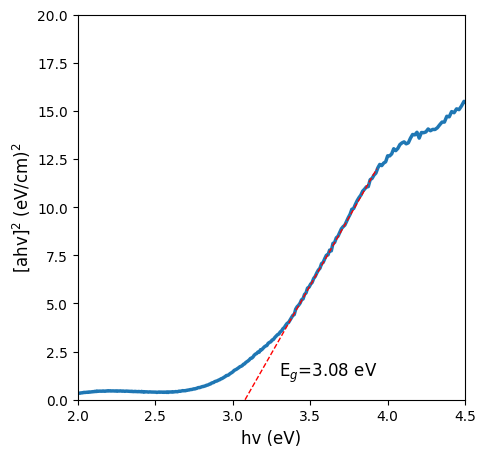

In [ ]:
#PANI-C Direct Bandgap
fig = plt.figure(5,figsize=(5,5))
plt.plot(tauc["hv"], tauc["PANI-C"],lw=2.5)
plt.plot([3.08,3.93],[0,12.0],ls="--", color='r',lw=1)
#limits, ticks and label on the axes. If we pass empty list to ticks then it will hide values and ticks
plt.xlim(2,4.5)
plt.ylim(0,20)
plt.xlabel("hv (eV)",fontsize=12)
plt.ylabel("[ahv]$^2$ (eV/cm)$^2$",fontsize=12)
plt.text(3.3,1.2,"E$_g$=3.08 eV",fontsize=12)
#for saving figure in high quality
#plt.savefig('Eg_PANI-C.png', format='png', dpi=1200,bbox_inches='tight')

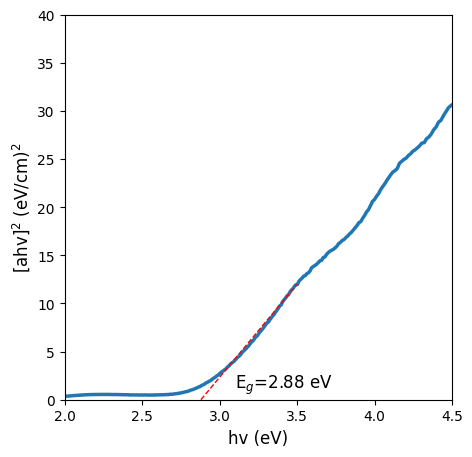

In [ ]:
#PANI-EC Direct Bandgap
fig = plt.figure(5,figsize=(5,5))
plt.plot(tauc["hv"], tauc["PANI-EC"],lw=2.5)
plt.plot([2.88,3.5],[0,12],ls='--',color='r',lw=1)
#limits, ticks and label on the axes. If we pass empty list to ticks then it will hide values and ticks
plt.xlim(2,4.5)
plt.ylim(0,40)
plt.xlabel("hv (eV)",fontsize=12)
plt.ylabel("[ahv]$^2$ (eV/cm)$^2$",fontsize=12)
plt.text(3.1,1.2,"E$_g$=2.88 eV",fontsize=12)
#for saving figure in high quality
#plt.savefig('Eg_PANI-EC.png', format='png', dpi=1200,bbox_inches='tight')

# TGA

In [ ]:
# Data Loading
tga=pd.read_excel("/content/TGA PANI Heliyon.xlsx")
tga.dropna(inplace=True)
tga.head()

,Temp,PANI,PANI-C,PANI-EC
0,25.00,100.00000,100.00000,100.00000
1,31.75,99.78470,99.88452,99.83180
2,38.50,99.07087,99.26176,99.15002
3,45.25,98.23923,98.54358,98.34493
4,52.00,97.31623,97.74674,97.48251


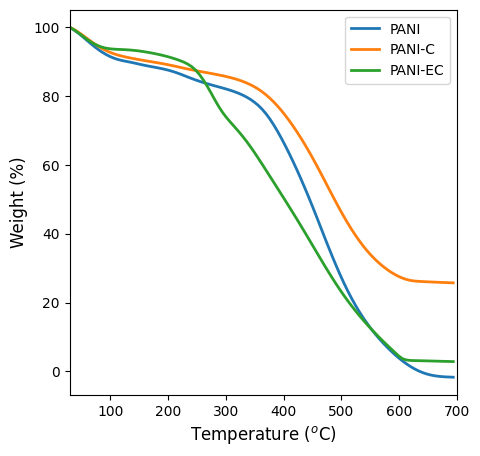

In [ ]:
fig = plt.figure(6,figsize=(5,5))
plt.plot(tga["Temp"],tga["PANI"],label="PANI",lw=2)
plt.plot(tga["Temp"],tga["PANI-C"],label="PANI-C",lw=2)
plt.plot(tga["Temp"],tga["PANI-EC"],label="PANI-EC",lw=2)
plt.xlim(30,700)

plt.legend()
plt.xlabel("Temperature ($^o$C)",fontsize=12)
plt.ylabel("Weight (%)",fontsize=12)
#plt.savefig('TGA100124.png', format='png', dpi=1200,bbox_inches='tight')